## QR Code Scan Histogram by Day of the Week

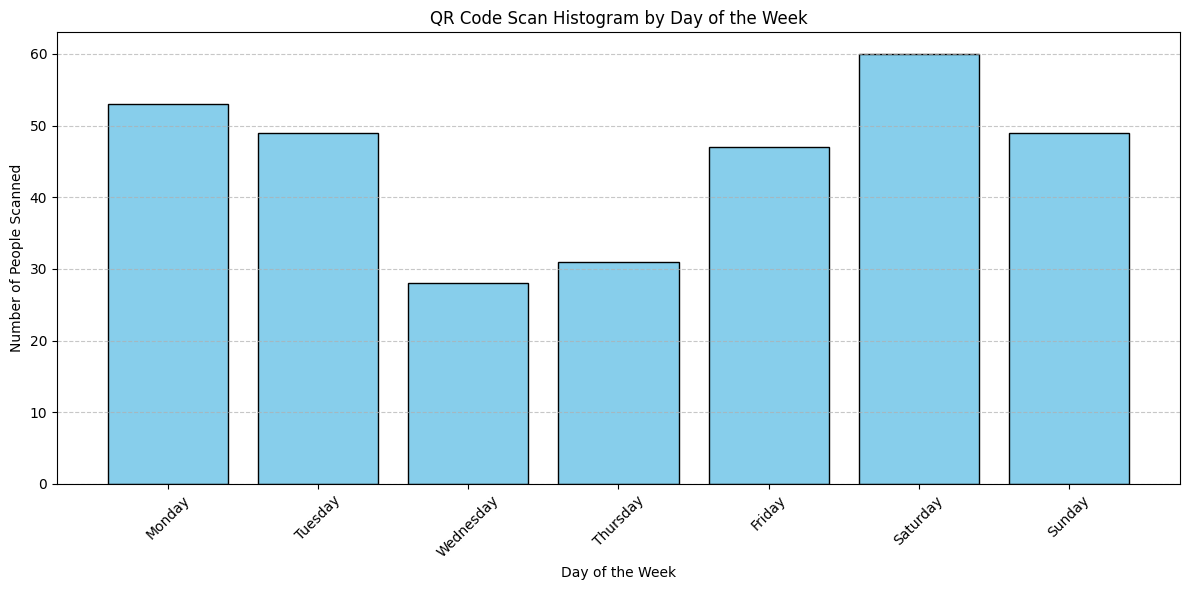

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from collections import defaultdict

# Read data from .txt file
#file_path = "./access_log.txt"  # Update the file path to point to the correct location
file_path = "./mock_data.txt"  # Update the file path to point to the correct location

# Initialize a dictionary to aggregate counts by day of the week
days_of_week = defaultdict(int)

with open(file_path, "r") as file:
    for line in file:
        try:
            # Split by space instead of comma
            parts = line.strip().rsplit(" ", 1)  # Splitting from the right to handle spaces in timestamps
            date_str = parts[0]  # Date and time
            count = int(parts[1])  # Number of people

            # Convert string to date object
            date_obj = datetime.datetime.strptime(date_str, "%Y/%m/%d %H:%M:%S").date()

            # Get the day of the week (0=Monday, 6=Sunday)
            day_of_week = date_obj.strftime("%A")

            # Aggregate counts by day of the week
            days_of_week[day_of_week] += count
        except (ValueError, IndexError):
            print(f"Skipping invalid line: {line}")

# Prepare data for plotting
sorted_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
people_counts = [days_of_week[day] for day in sorted_days]

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(sorted_days, people_counts, width=0.8, color="skyblue", edgecolor="black")

# Format x-axis (day of the week)
plt.xlabel("Day of the Week")
plt.ylabel("Number of People Scanned")
plt.title("QR Code Scan Histogram by Day of the Week")

# Improve date formatting
plt.xticks(rotation=45)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


## QR Code Scan Histogram (Hourly)

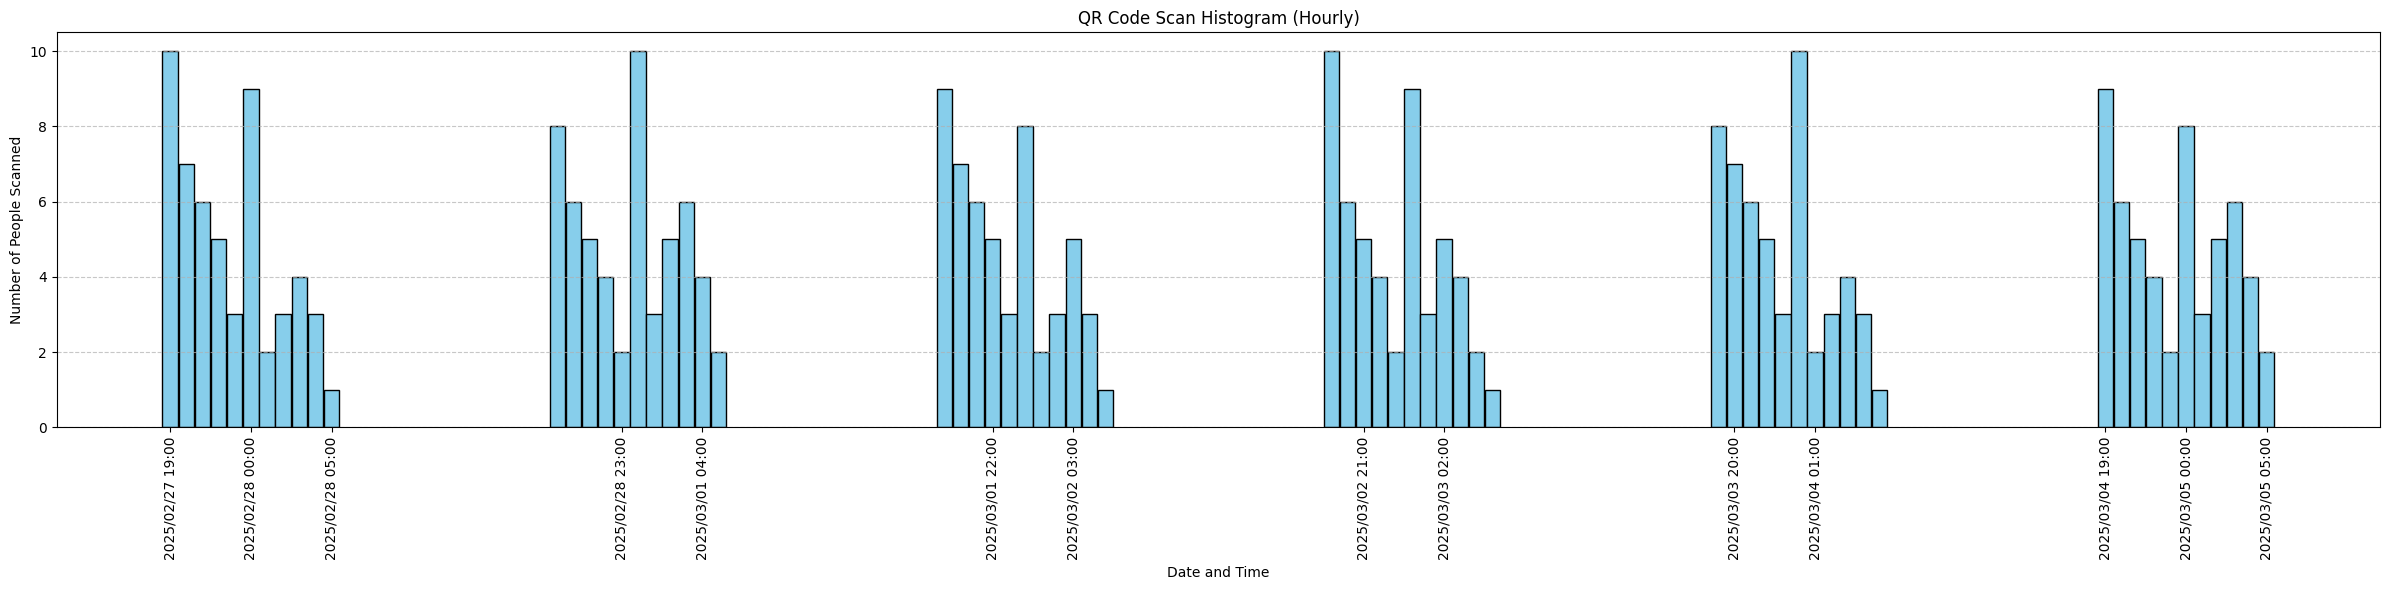

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import datetime
from collections import defaultdict

# Read data from .txt file
#file_path = "./access_log.txt"  # Update the file path
file_path = "./mock_data.txt"  # Update the file path

dates = []
people_counts = []

hourly_data = defaultdict(int)

with open(file_path, "r") as file:
    for line in file:
        try:
            # Split by space
            parts = line.strip().rsplit(" ", 1)
            date_str = parts[0]  # Date and time
            count = int(parts[1])  # Number of people (force integer)

            # Convert string to datetime object
            date_obj = datetime.datetime.strptime(date_str, "%Y/%m/%d %H:%M:%S")
            hour_obj = date_obj.replace(minute=0, second=0, microsecond=0)

            hourly_data[hour_obj] += count
        except (ValueError, IndexError):
            print(f"Skipping invalid line: {line}")

# Prepare data for plotting
dates = list(hourly_data.keys())
people_counts = list(hourly_data.values())

# Plot histogram
plt.figure(figsize=(24, 6))
# plt.bar(dates, people_counts, width=0.03, color="skyblue", edgecolor="black")
plt.bar(dates, people_counts, width=0.04, color="skyblue", edgecolor="black")

# Format x-axis (date)
plt.xlabel("Date and Time")
plt.ylabel("Number of People Scanned")
plt.title("QR Code Scan Histogram (Hourly)")

# Ensure y-axis only shows whole numbers
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Improve x-axis formatting
# plt.xticks(rotation=45)
plt.xticks(dates[::5], rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m/%d %H:%M"))

# Add grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

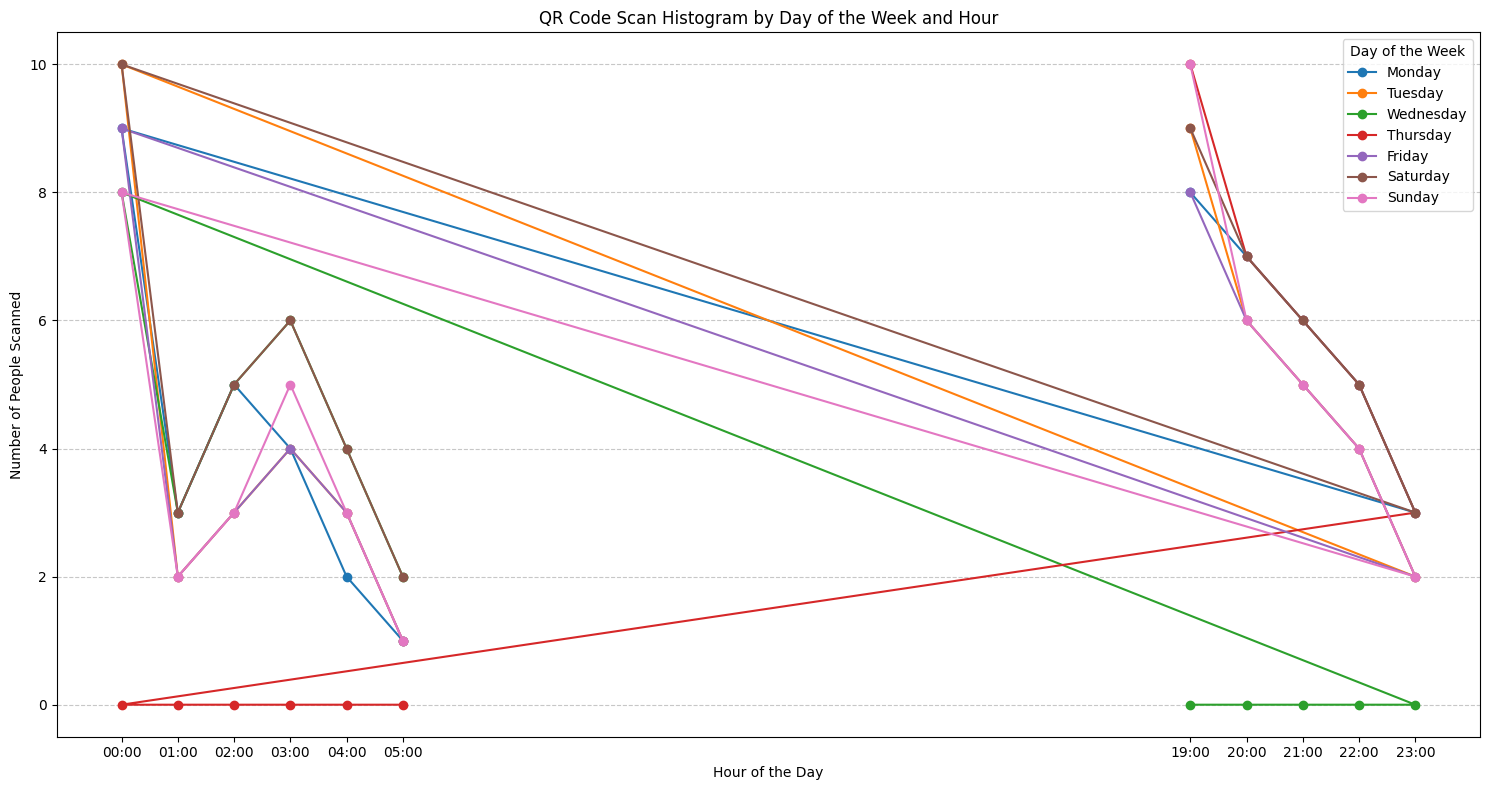

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from collections import defaultdict

# Read data from .txt file
# file_path = "./access_log.txt"  # Update the file path to point to the correct location
file_path = "./mock_data.txt"  # Update the file path to point to the correct location

# Initialize a dictionary to aggregate counts by day of the week and hour
days_hours = defaultdict(lambda: defaultdict(int))

with open(file_path, "r") as file:
    for line in file:
        try:
            # Split by space instead of comma
            parts = line.strip().rsplit(" ", 1)  # Splitting from the right to handle spaces in timestamps
            date_str = parts[0]  # Date and time
            count = int(parts[1])  # Number of people

            # Convert string to datetime object
            date_obj = datetime.datetime.strptime(date_str, "%Y/%m/%d %H:%M:%S")

            # Get the day of the week (0=Monday, 6=Sunday)
            day_of_week = date_obj.strftime("%A")

            # Get the hour
            hour = date_obj.hour

            # Aggregate counts by day of the week and hour
            days_hours[day_of_week][hour] += count
        except (ValueError, IndexError):
            print(f"Skipping invalid line: {line}")

# Prepare data for plotting
sorted_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
hours = list(range(19, 24)) + list(range(0, 6))  # Hours from 19:00 to 05:00

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot data for each day
for day in sorted_days:
    people_counts = [days_hours[day][hour] for hour in hours]
    ax.plot(hours, people_counts, marker='o', label=day)

# Format x-axis
ax.set_xticks(hours)
ax.set_xticklabels([f"{hour:02d}:00" for hour in hours])
ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of People Scanned")
ax.set_title("QR Code Scan Histogram by Day of the Week and Hour")
ax.legend(title="Day of the Week")
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()